In [1]:
## Importing necessary libraries..

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.. Lets Pre-process our data
    Let's read the data from the "GlobalTemperatures.csv" file, 
    which has a monthly Earth’s temperature and plot it on the 
    chart.

In [2]:
#global_temp=pd.read_csv(r'F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalTemperatures.csv')
global_temp=pd.read_csv(r'GlobalTemperatures.csv')

In [3]:
global_temp.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


### how to clean/prepare/pre-process data :
    a.. remove duplicate rows
    b.. remove irrelevant data.
    c.. Fix structural errors.
    d.. check missing values in data
    e.. check data-type of each feature is right or not..
    f.. deal with the outliers

In [4]:
global_temp.duplicated().sum()

### ie no duplicated observations we have !

0

In [5]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [ ]:
### date-type of 'dt' must be 'Date-time' bcz it holds date-time values..

'''
in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,
ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

'''

In [6]:
global_temp['dt'][0]

'1750-01-01'

In [7]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [8]:
global_temp['dt'].dtype

dtype('<M8[ns]')

In [9]:
global_temp['dt'][0]

Timestamp('1750-01-01 00:00:00')

# 2.. Does Global Warming exists ?

In [10]:

## extracting year from the 'dt' feature..
global_temp['years']=global_temp['dt'].dt.year

In [11]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [12]:
## finding "avg_LandAverageTemperature" & "avg_LandAverageTemperatureUncertainty" for each of the year..

data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [13]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [14]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty'], dtype='object')

    Maximum Uncertainty will be Avg temperature  +   deviation(Uncertainty)

    whereas minimum Uncertainty will be Avg temp -   deviation(Uncertainty)

    and this deviation is exactly your Uncertainty...

In [15]:
## so lets create 2 more features as 'Uncertainty_top' & 'Uncertainty_bottom'
data['Uncertainty_top']   =data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [16]:
data.head(2)

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000


In [17]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],
      dtype='object')

<AxesSubplot:xlabel='years'>

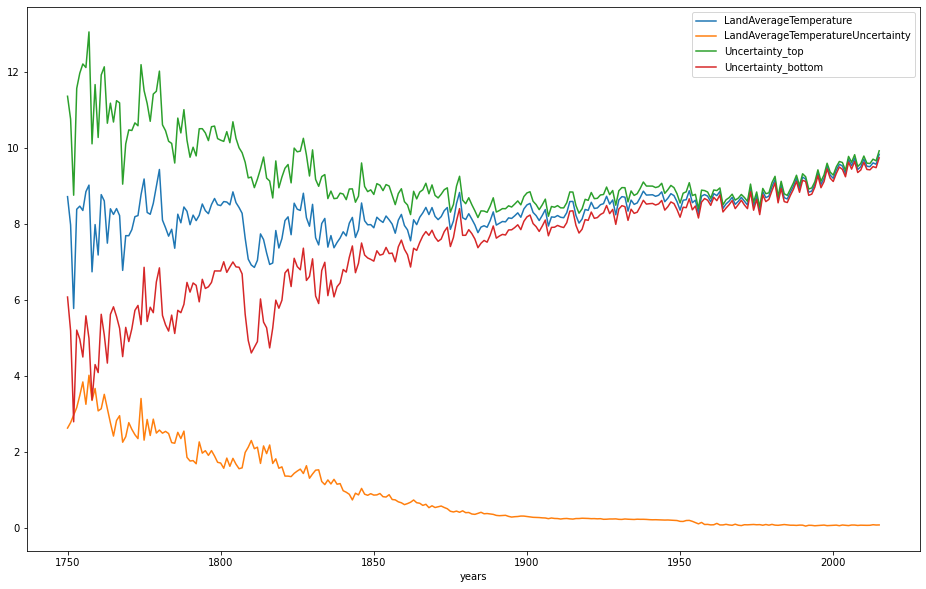

In [18]:
### pandas lineplot :
data.plot(x='years',y=['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],figsize=(16,10))

    Conclusion ::  From the charts you can see, that there is global warming nowadays. 
        The average temperature of Earth surface has the highest value in 
        the last three centuries. The fastest temperature growth occurred 
        in the last 30 years! This worries me, I hope soon humanity will 
        fully switch to ecological sources of energy, that will reduce CO2. 
        If it’s will not happened, we will be in disaster. This charts also 
        have confidence intervals, which shows that measurement of temperatur
        e has become more accurate in the last few years.

# 3.. Analyse Average temperature in each season ?

In [19]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years'],
      dtype='object')

In [20]:
## extract 'month' from 'dt' feature.
global_temp['month']=global_temp['dt'].dt.month

In [21]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2


In [22]:
global_temp['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [23]:
## lets define a function to extract season from 'month'

def get_season(month):
    
    if month>=3 and month<=5:
        return 'spring'
    
    elif month>=6 and month<=8:
        return 'summer'
    
    elif month>=9 and month<=11:
        return 'autumn'
    
    else:
        return 'winter'

In [24]:
## applying a function on top of 'month' feature..

global_temp['season']=global_temp['month'].apply(get_season)

In [25]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years', 'month',
       'season'],
      dtype='object')

In [26]:
years=global_temp['years'].unique()

In [27]:
years

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [28]:
global_temp['season'].unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [29]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [30]:
global_temp[global_temp['years']==year]

NameError: name 'year' is not defined

In [31]:
## lets define 4 blank lists to store all the "season temp"  of "various years".

spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

for year in years:
    current_yr=global_temp[global_temp['years']==year]
    
    spring_temps.append(current_yr[current_yr['season']=='spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season']=='summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr[current_yr['season']=='autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season']=='winter']['LandAverageTemperature'].mean())
    

In [32]:
spring_temps

[8.563,
 6.734999999999999,
 7.035499999999999,
 8.627333333333334,
 9.074333333333334,
 8.583666666666666,
 9.466,
 8.604666666666667,
 6.896666666666666,
 6.897333333333333,
 6.653666666666666,
 8.916,
 7.809333333333332,
 6.716,
 8.192,
 8.868666666666668,
 8.432333333333332,
 7.831,
 6.144000000000001,
 8.803333333333333,
 7.132000000000001,
 6.0523333333333325,
 7.148666666666666,
 8.866999999999999,
 10.607,
 9.036666666666667,
 7.522333333333333,
 7.774333333333334,
 8.957999999999998,
 10.370666666666667,
 11.737666666666664,
 7.599,
 7.390999999999998,
 8.397333333333334,
 7.3580000000000005,
 6.173666666666667,
 8.849666666666666,
 7.9576666666666656,
 8.159333333333334,
 7.783,
 6.997333333333333,
 7.9253333333333345,
 7.914666666666666,
 8.248,
 9.146333333333333,
 8.552,
 7.507666666666666,
 7.024333333333334,
 8.953333333333333,
 8.041666666666666,
 8.224666666666666,
 8.660666666666666,
 7.760333333333333,
 8.653666666666666,
 8.863,
 8.328999999999999,
 8.07533333333333

In [33]:
### lets make a blank dataframe ..

season=pd.DataFrame()

In [34]:
## assigning features in dataframe..

season['years']=years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

In [35]:
season

,years,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...,...
261,2011,9.190000,14.954667,10.026000,3.893333
262,2012,9.429667,14.762667,10.208000,3.629000
263,2013,9.166667,14.771000,10.278000,4.210333
264,2014,9.516333,14.694333,10.044667,4.027333


In [32]:
##data.plot(x='years',y=['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
 ##      'Uncertainty_top', 'Uncertainty_bottom'],figsize=(16,10))

In [36]:
season.columns

Index(['years', 'spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps'],
      dtype='object')

In [37]:
season[['spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps']]

,spring_temps,summer_temps,autumn_temps,winter_temps
0,8.563000,14.518333,8.890000,2.963000
1,6.735000,14.116000,10.673000,1.729000
2,7.035500,NaN,7.587000,2.717000
3,8.627333,14.608333,9.212333,1.104333
4,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...
261,9.190000,14.954667,10.026000,3.893333
262,9.429667,14.762667,10.208000,3.629000
263,9.166667,14.771000,10.278000,4.210333
264,9.516333,14.694333,10.044667,4.027333


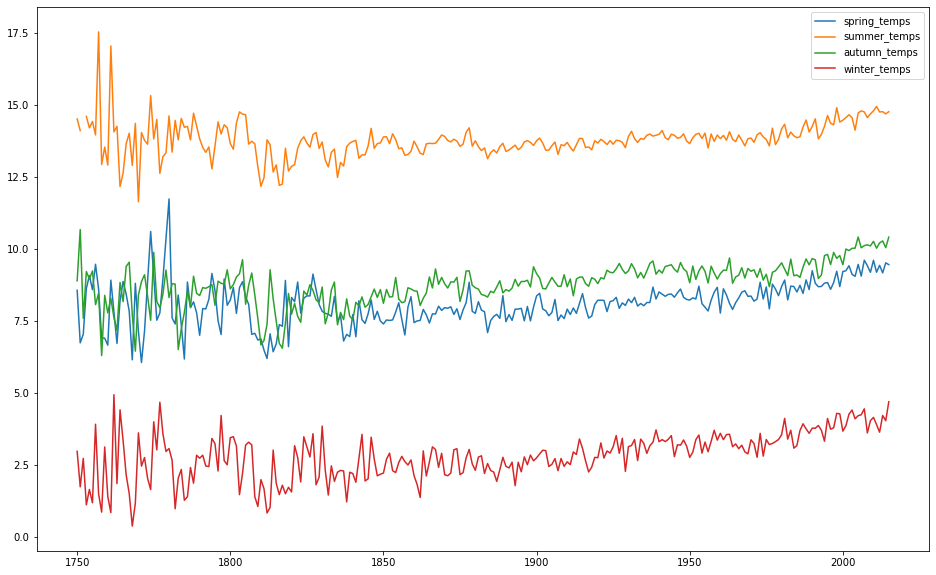

In [38]:
plt.figure(figsize=(16,10))
plt.plot(season['years'],season[['spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps']])

plt.legend(['spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps'])

    Is it getting warmer? Yes, it is.

# 4.. how to prepare your data for Time series Modelling..
    Prepare your data for Modelling.. (lets do sampling 
        of data & then pre-processing of data )

In [39]:
### lets read 'GlobalLandTemperaturesByCity.csv'

#cities=pd.read_csv(r'F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalLandTemperaturesByCity.csv')
cities=pd.read_csv(r'GlobalLandTemperaturesByCity.csv')

In [40]:
cities.shape

(8599212, 7)

#### how to do sampling in data..
    1.. Random sampling
    2.. we say pick first 1M or last 1M points..
    3.. we say we pick data for Top economies.. (Russia ,USA ,
             UK ,India ,France etc.. )
             
         or pick data for some cities of USA , eg 
         ['New York','Los Angeles','San Francisco' ,'Mumbai' ,'Delhi']

In [41]:
## finding unique countries in 'country' feature..

cities['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [42]:
cities['Country'].nunique()

159

In [43]:
## creating separate datafrme for 'United States' only..
usa=cities[cities['Country']=='United States']

In [44]:
usa.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [45]:
## unique cities in 'usa'..
usa['City'].unique()

array(['Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allentown',
       'Amarillo', 'Anaheim', 'Anchorage', 'Ann Arbor', 'Antioch',
       'Arlington', 'Arvada', 'Atlanta', 'Aurora', 'Austin',
       'Bakersfield', 'Baltimore', 'Baton Rouge', 'Beaumont', 'Bellevue',
       'Berkeley', 'Birmingham', 'Boston', 'Bridgeport', 'Brownsville',
       'Buffalo', 'Burbank', 'Cambridge', 'Cape Coral', 'Carrollton',
       'Cary', 'Cedar Rapids', 'Chandler', 'Charleston', 'Charlotte',
       'Chattanooga', 'Chesapeake', 'Chicago', 'Chula Vista',
       'Cincinnati', 'Clarksville', 'Clearwater', 'Cleveland',
       'Colorado Springs', 'Columbia', 'Columbus', 'Concord',
       'Coral Springs', 'Corona', 'Corpus Christi', 'Costa Mesa',
       'Dallas', 'Dayton', 'Denton', 'Denver', 'Des Moines', 'Detroit',
       'Downey', 'Durham', 'East Los Angeles', 'Edison', 'El Monte',
       'El Paso', 'Elizabeth', 'Escondido', 'Eugene', 'Evansville',
       'Fairfield', 'Fayetteville', 'Flint', 'Fontana',

In [46]:
usa['City'].nunique()

248

In [47]:
## considering data of ['New York','Los Angeles','San Francisco'] in my usa dataframe..
usa_cities=['New York','Los Angeles','San Francisco']

In [48]:
usa[usa['City'].isin(usa_cities)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W
...,...,...,...,...,...,...,...
6637248,2013-05-01,17.434,0.327,San Francisco,United States,37.78N,122.03W
6637249,2013-06-01,19.759,0.338,San Francisco,United States,37.78N,122.03W
6637250,2013-07-01,20.657,0.360,San Francisco,United States,37.78N,122.03W
6637251,2013-08-01,19.731,0.522,San Francisco,United States,37.78N,122.03W


In [49]:
data2=usa[usa['City'].isin(usa_cities)]

In [50]:
data2.shape

(7193, 7)

In [51]:
data2.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W


In [52]:
data2=data2[['dt','AverageTemperature']]

In [53]:
data2.head(2)

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577


In [54]:
## assigning your own column name..
data2.columns=['Date','Temp']

In [55]:
data2

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834
...,...,...
6637248,2013-05-01,17.434
6637249,2013-06-01,19.759
6637250,2013-07-01,20.657
6637251,2013-08-01,19.731


In [56]:
data2.dtypes

Date     object
Temp    float64
dtype: object

In [57]:
## converting data-type of 'Date' feature into date-time ..
data2['Date']=pd.to_datetime(data2['Date'])

In [58]:
data2.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [59]:
## total missing values in each of the feature..
data2.isnull().sum()

Date      0
Temp    120
dtype: int64

In [60]:
## dropping the missing values..
data2.dropna(inplace=True)

In [61]:
data2.head(3)

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814


    note:   for Machine Learning,feature is a columns & we have 
               by-default index as from 0 but for our time series 
               Problem,we have date column our as row-index

In [62]:
data2.set_index('Date',inplace=True)

In [63]:
data2.head(4)

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704


# 5.. How to find whether data has Seasonality factor or not..
      we will try to convert our seasonal data into stationary bcz Time SEries algos works phenomenal with stationary data..

    lets understand what is seasoanlity ,stationary & couple of Time series Terms..

    seasonality ->> When mean & variance is not constant throughout the data ,
                    ie data has a trend here..
                    
    stationary data ->>  so data that has no trend ie that has constant 
                       mean & std dev throughout data..
                       
    if not stationary then we have to make it stationary using various manipulations..


    Seasonality is opposite of stationary ,ie 
        A time series with a clear seasonal component is referred to as non-stationary...
        
        ie the goal is we have to convert seasonal data into stationary data..
        
        
        
        a)Visualisation approach
    
    (seasonality is all about suppose in each yr in christmas sales goes up) and then down ,
       ie this is a cycle that repeats over time, such as monthly or yearly. 
       
       There are many types of seasonality; 
       for example:

    Time of Day.
    Daily.
    Weekly.
    Monthly.
    Yearly.
    Once seasonality is identified, it can be removed

    The model of seasonality can be removed from the time series. 
    This process is called Seasonal Adjustment, or Deseasonalizing.
    A time series where the seasonal component has been removed is called seasonal stationary.
    A time series with a clear seasonal component is referred to as non-stationary.
https://machinelearningmastery.com/time-series-seasonality-with-python/

        

In [64]:
###  i'm going to create a pivot table to plot the monthly temperatures through the years
## so I need 'year' & 'month' feature..
data2['year']=data2.index.year

In [65]:
data2['month']=data2.index.month

In [66]:
data2.head(3)

,Temp,year,month
Date,,,
1849-01-01,8.819,1849,1
1849-02-01,9.577,1849,2
1849-03-01,11.814,1849,3


In [67]:
## creating a pivot table :
pivot=data2.pivot_table(values='Temp',index='month',columns='year')

In [68]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


Text(0, 0.5, 'Temperatures')

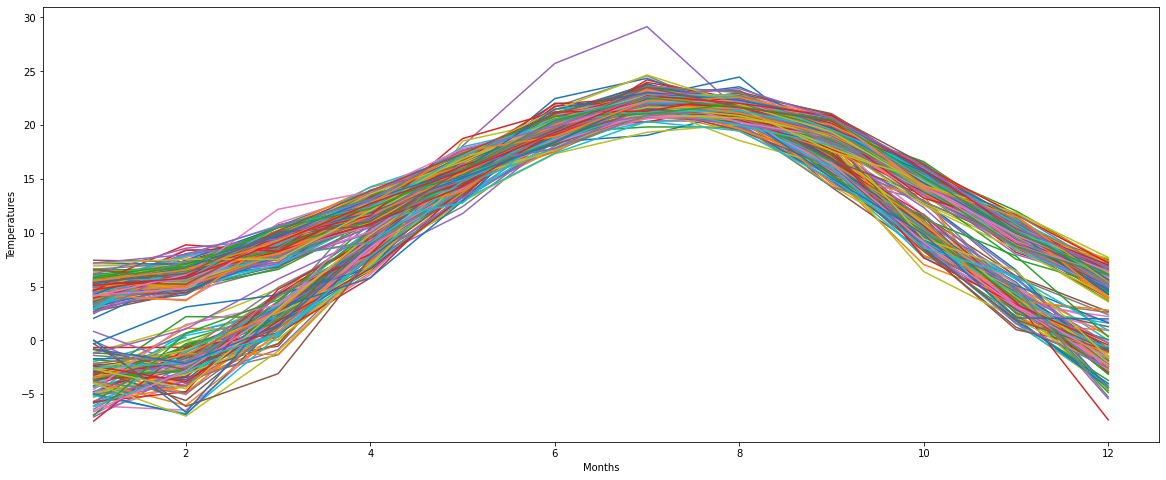

In [69]:
## if we want to plot with respect to time or index of dataframe ,  we can use pivot.plot() function of pandas ..

pivot.plot(figsize=(20,8))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

    looking this graph,we can say this data is seasonal
        The series clearly has some seasonality, the higher temperatures 
        are around b/w June & August and the lower are between December & Feb
        so thats basically a observation that u can drawn and represent to ur client..


# 6.. How to find whether data is stationary or not..

### ways to find that...
    a.. using data visualisation (lineplot to find out 
                               whats a trend of data)
                               
    b.. Evaluating the descriptive statistics ( ie compute
                 mean & variance of various chunks of data )
https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/

    c.. using statistical Tests (AD-Fuller , KPSS Test )

<AxesSubplot:xlabel='Date'>

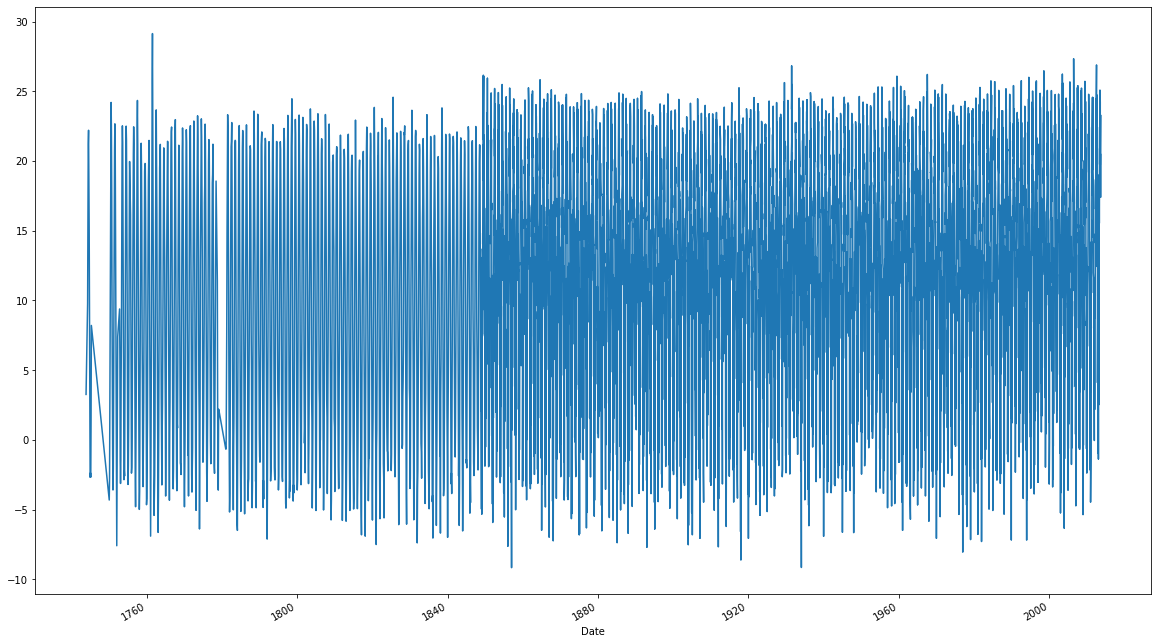

In [70]:
### checking whether data is stationary or not..

data2['Temp'].plot(figsize=(20,12))

In [ ]:
'''
It seems that data is seasonal in nature.. The spread of the data indicates that there is a significant variation in the data. 
To flatten the growing variance, we need to transform the data.

A recurring pattern with a defined and predictable regularity dependent on the time of year, week, or day 
is referred to as seasonality.



'''

#### b.. using statistical Tests
https://analyticsindiamag.com/how-to-make-a-time-series-stationary/


    >> Ad-fuller Test
    >> Kwiatkowski Phillips Schmidt Shin (KPSS) test:

In [71]:
### Testing For Stationarity using Augmented Dickey-Fuller test..

from statsmodels.tsa.stattools import adfuller

In [72]:
adfuller(data2['Temp'])
#ilk değer ADF test istatistik değeridir
#ikinci parametre p-valuedur. 0.05'ten büyük olduğu için durağan değildir non-stationarydir.
#['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','critical values']

(-2.0063893036757925,
 0.2837786583333273,
 35,
 7037,
 {'1%': -3.431279613044704,
  '5%': -2.8619508146206374,
  '10%': -2.5669886726127307},
 28011.222669408726)

In [ ]:
'''
adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','critical values']

most imp is p-value
p-value concept is almost similar to Hypothesis testing,
Hypothesis Testing have 2 Hypothesis(Alternate & Null Hypothesis)

Null hypo says Data is not Stationery
whereas Alternate hypo says data is stationery

lags are those which are our previous Data

'''

In [ ]:
#if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is 
# true,ie data is stationery

In [ ]:
#Ho: ie null hypoIt is non stationary
#H1: ie Alternate Hypo ,It is stationary
#zip basically combines result,labels

In [73]:
def adfuller_test(data):
    result=adfuller(data)
    
    labels=['ADF Test statistics','p-value','lags_used','nobs']
    
    for value,label in zip(result,labels):
        print(label + ' : ' + str(value))
    if result[1] <=0.05:
        print('reject the Ho ,data is stationary')
    else:
        print('fail to reject the Ho ,data is not stationary')
    

In [74]:
adfuller_test(data2['Temp'])

ADF Test statistics : -2.0063893036757925
p-value : 0.2837786583333273
lags_used : 35
nobs : 7037
fail to reject the Ho ,data is not stationary


# 7.. How to make your data stationary ..

#### Now data is not non-stationary ,ie we have to make it stationary..
    using log , sq root , cube root , differencing etc...

In [79]:
##data2['Temp'].head(10)

Date
1849-01-01     8.819
1849-02-01     9.577
1849-03-01    11.814
1849-04-01    13.704
1849-05-01    14.834
1849-06-01    21.173
1849-07-01    26.159
1849-08-01    26.099
1849-09-01    21.848
1849-10-01    16.549
Name: Temp, dtype: float64

In [84]:
##data2['Temp'].shift(3).head(10)

Date
1849-01-01       NaN
1849-02-01       NaN
1849-03-01       NaN
1849-04-01     8.819
1849-05-01     9.577
1849-06-01    11.814
1849-07-01    13.704
1849-08-01    14.834
1849-09-01    21.173
1849-10-01    26.159
Name: Temp, dtype: float64

In [94]:
data2['first_temp_diff']=data2['Temp'] - data2['Temp'].shift(12)
#12 aylık fark alındı ki yıllık bazdaki mevsimselliği kaldıralım

In [ ]:
'''
why taken shift(12) , bcz basically year has 12 month cycle , ie in order to remove seasonal component..

In previous diagram of pivot table , we have figured out that we have yearly seasonality.. , 
so lets use shift(12) to remove seasonality 

'''

In [95]:
data2.head(13)
#7087-8819 =1732

,Temp,year,month,first_temp_diff
Date,,,,
1849-01-01,8.819,1849,1,NaN
1849-02-01,9.577,1849,2,NaN
1849-03-01,11.814,1849,3,NaN
1849-04-01,13.704,1849,4,NaN
1849-05-01,14.834,1849,5,NaN
1849-06-01,21.173,1849,6,NaN
1849-07-01,26.159,1849,7,NaN
1849-08-01,26.099,1849,8,NaN
1849-09-01,21.848,1849,9,NaN


In [96]:
## Again perform Aug.dickey fuller test on df['first_diff_temp']

adfuller_test(data2['first_temp_diff'].dropna())
#p-value 0.0 olduğu için durağandır deriz

ADF Test statistics : -21.239650404910897
p-value : 0.0
lags_used : 35
nobs : 7025
reject the Ho ,data is stationary


In [ ]:
''
now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo
ie data is stationery

Note : if p-value is almost 0, then we can say , we have a wonderful stationary graph

'''

<AxesSubplot:xlabel='Date'>

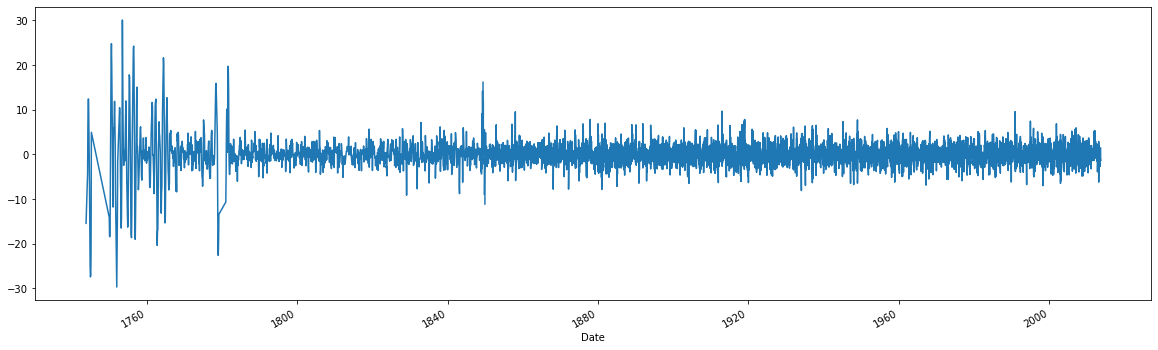

In [97]:
data2['first_temp_diff'].plot(figsize=(20,6))

In [98]:
data2.head(15)

,Temp,year,month,first_temp_diff
Date,,,,
1849-01-01,8.819,1849,1,NaN
1849-02-01,9.577,1849,2,NaN
1849-03-01,11.814,1849,3,NaN
1849-04-01,13.704,1849,4,NaN
1849-05-01,14.834,1849,5,NaN
1849-06-01,21.173,1849,6,NaN
1849-07-01,26.159,1849,7,NaN
1849-08-01,26.099,1849,8,NaN
1849-09-01,21.848,1849,9,NaN


# 8.. Lets build Time Series model..
    Lets Build a basic moving Avg model  

    types of models in Time-Series :
         1.Base line model
         2.Exponential model
         3.AR model
         4.MA model
         5.ARIMA model
         6.SARIMA model(Seasonal ARIMA)

In [99]:
df=data2[['first_temp_diff']]

In [100]:
df.head(15)

,first_temp_diff
Date,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN
1849-06-01,NaN
1849-07-01,NaN
1849-08-01,NaN
1849-09-01,NaN


In [101]:
df.dropna(inplace=True)

In [102]:
df.head()

,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


In [103]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [104]:
df.head(10)

,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799
1850-06-01,-0.932
1850-07-01,-2.714
1850-08-01,-0.164
1850-09-01,0.714


In [105]:
df['first_temp_diff'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_temp_diff, Length: 7061, dtype: float64

In [106]:
### Smoothening your series using moving average
## Rolling is just like a window that you are going to consider or I can say its a window 
#that we have considered for Moving average,
## lets say 5 is the window size or 5 is the business period

df['Predictions']=df['first_temp_diff'].rolling(window=5).mean()

In [107]:
df.head(10)

,first_temp_diff,Predictions
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594


In [108]:
df.dropna(inplace=True)

In [109]:
df.head(3)

,first_temp_diff,Predictions
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


In [110]:
df.columns=['actual_temp','forecast_temp']

In [111]:
df.head(3)

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


In [112]:
### check accuracy of your model using RMSE..

from sklearn.metrics import mean_squared_error

In [113]:
np.sqrt(mean_squared_error(df['actual_temp'],df['forecast_temp']))

## why np.sqrt, bcz mean_squared_error gives square of error and then by calling np.sqrt we get actual error

2.3934235122562058

# 9.. Lets Build ARIMA Model..

In [114]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

In [115]:
df.head(3)

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


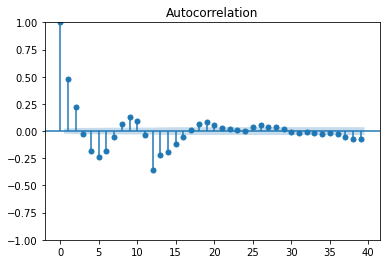

In [116]:
plot_acf(df['actual_temp'])
plt.show()
## q-3

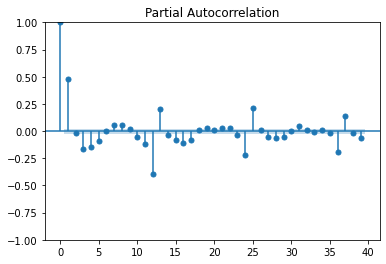

In [117]:
plot_pacf(df['actual_temp'])
plt.show()
## p-2

In [118]:
df.head(3)

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


In [119]:
df=df[['actual_temp']]

In [120]:
df.head(2)

,actual_temp
Date,
1850-05-01,1.799
1850-06-01,-0.932


In [121]:
df.shape

(7057, 1)

In [122]:
training_data=df[0:6000]
testing_data=df[6000:]

### create test data that is basically unseen to our model or which is basically is used for evaluation

In [127]:
#from statsmodels.tsa.arima_model import ARIMA  alttaki hale dönmüş 20230212
from statsmodels.tsa.arima.model import ARIMA

In [134]:
### arima= ARIMA(training_data,order=(p,d,q))

arima=ARIMA(training_data,order=(2,1,3))

In [135]:
model=arima.fit()

In [142]:
## doing predictions..

pred=model.forecast(steps=len(testing_data))[0:]
#pred=model.forecast(steps=len(testing_data))

In [143]:
pred

6000   -0.405406
6001    0.151818
6002   -0.250076
6003    0.177059
6004   -0.192337
          ...   
7052   -0.002116
7053   -0.002116
7054   -0.002116
7055   -0.002116
7056   -0.002116
Name: predicted_mean, Length: 1057, dtype: float64

In [138]:
len(pred)

1057

In [139]:
len(testing_data)

1057

In [144]:
np.sqrt(mean_squared_error(testing_data,pred))

1.512485429857625

In [ ]:
'''
now u will see it is better than MA model that we have created having Error as (2.4 degree centigrade) 
has decreased to 1.5 which shows that arima model is much more good in such sceanario rather than Baseline 

'''

# 10.. Lets do model Tuning or Hyperparameter Tuning..

In [145]:
#### now define hyper-para=meters 

p_values=range(0,4)
d_values=range(0,3)
q_values=range(0,4)


In [151]:
### so we are just trying to provide pairs of (p,d,q) & whichever pair will give me 
#least error i will consider that pair, 


for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            
            train=df[0:6000]
            test=df[6000:]
            
            predictions=[]
            
            ### now we have train & test data that we can pass to our algorithm
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    
                    ## Role of disp(displacement) is to control the frequency of the output during the iterations. 
                    
                    model=arima.fit(disp=0)
                    pred_y=model.forecast()[0]  #bu halde sonuç dönmüyor
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))

                except:
                    continue
                